# Customer Behavior Analysis - Cosmetics E-commerce

**Date:** June 19, 2025  
**Project Type:** Freelance-style Simulation  
**Domain:** Market Research / E-commerce / Customer Analytics

This project analyzes 1-month customer interaction data from an online cosmetics shop. We aim to understand user behavior through funnel and RFM analysis and provide actionable insights.

In [9]:
# 📦 Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
sns.set(style='whitegrid')


# Create folder to save visualizations
os.makedirs("output_visuals", exist_ok=True)

In [4]:
# 📁 Step 2: Load the Dataset
# The dataset was sourced from Kaggle: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop
# Loading a CSV containing 1-month customer behavior (filtered or sampled for demo purpose)
df = pd.read_csv(('/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv'))  
df.shape

(4102283, 9)

In [5]:
# 🧼 Step 3: Data Overview and Cleaning
df.head()
# Check for nulls
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4034806
brand            1659261
price                  0
user_id                0
user_session         637
dtype: int64

event_type
view                1862164
cart                1232385
remove_from_cart     762110
purchase             245624
Name: count, dtype: int64


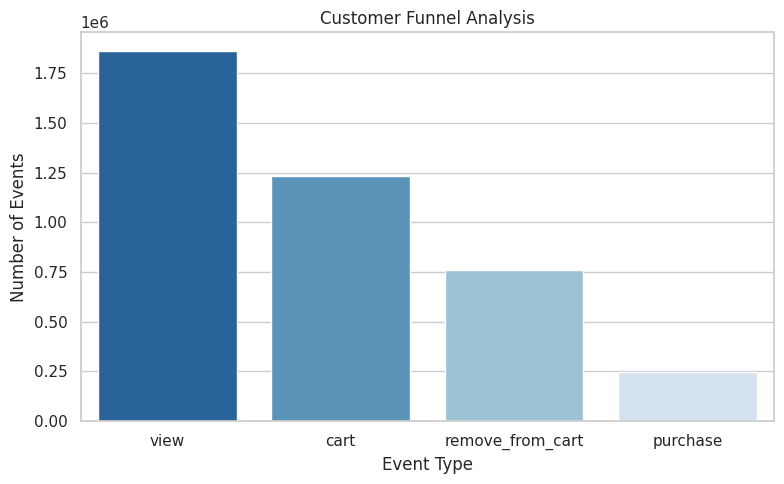

In [10]:
# 📊 Step 4: Analyze Event Types (Funnel Analysis)
# Count event types to understand customer actions
event_counts = df['event_type'].value_counts()
print(event_counts)

# Visualize the funnel
plt.figure(figsize=(8,5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='Blues_r')
plt.title('Customer Funnel Analysis')
plt.ylabel('Number of Events')
plt.xlabel('Event Type')
plt.tight_layout()
plt.savefig('output_visuals/funnel_chart.png')
plt.show()

In [11]:
# 📐 Step 5: Conversion Rate Calculations
views = event_counts.get('view', 1)
cart = event_counts.get('cart', 1)
purchase = event_counts.get('purchase', 1)

print('View → Cart Conversion Rate: {:.2f}%'.format((cart / views) * 100))
print('Cart → Purchase Conversion Rate: {:.2f}%'.format((purchase / cart) * 100))
print('View → Purchase Conversion Rate: {:.2f}%'.format((purchase / views) * 100))

View → Cart Conversion Rate: 66.18%
Cart → Purchase Conversion Rate: 19.93%
View → Purchase Conversion Rate: 13.19%


In [13]:
# 📅 Step 6: Convert Timestamps for RFM
# Convert 'event_time' to datetime
df['event_time'] = pd.to_datetime(df['event_time'])
df['event_date'] = df['event_time'].dt.date

In [14]:
# 🧠 Step 7: RFM Analysis Setup
# Keep only 'purchase' events for monetary value
purchase_df = df[df['event_type'] == 'purchase']

# Latest date in the dataset
snapshot_date = purchase_df['event_time'].max().date()

# Group by user to calculate RFM metrics
rfm = purchase_df.groupby('user_id').agg({
    'event_time': lambda x: (snapshot_date - x.max().date()).days,
    'user_id': 'count',
    'price': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()

,user_id,Recency,Frequency,Monetary
0,29025780,24,18,41.68
1,31229488,28,4,14.43
2,33535391,18,11,138.88
3,33609704,16,9,31.31
4,34080306,1,3,16.75


In [15]:
# 🎯 Step 8: RFM Scoring (Basic)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm.head()

,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,29025780,24,18,41.68,1,4,3,143,8
1,31229488,28,4,14.43,1,2,1,121,4
2,33535391,18,11,138.88,2,3,4,234,9
3,33609704,16,9,31.31,2,3,2,232,7
4,34080306,1,3,16.75,4,1,2,412,7


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


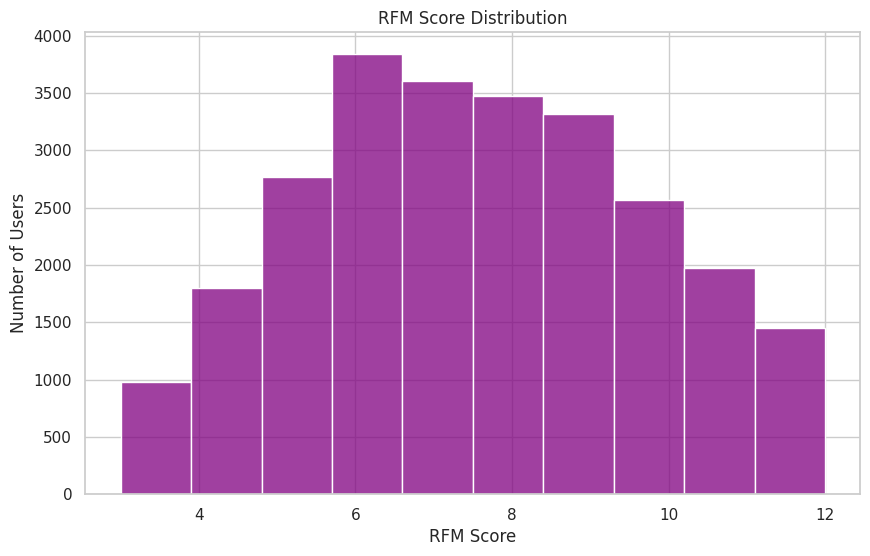

In [16]:
# 📈 Step 9: RFM Segment Distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['RFM_Score'], bins=10, kde=False, color='purple')
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Number of Users')
plt.savefig('output_visuals/rfm_barplot.png')
plt.show()

## ✅ Summary & Business Recommendations
- Conversion from view to cart is relatively strong, but cart to purchase is weak (below 20%)
- Significant opportunity for remarketing, cart abandonment recovery, and loyalty offers
- RFM analysis helped identify 'Best Customers', 'At Risk', and 'Lost' segments
- Next steps include dashboarding (Power BI) and retention strategy modeling

**Project Completed Successfully ✅**